In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

In [5]:
datapath = "https://raw.githubusercontent.com/TaniaZakowski/Prediction-Buildings-Energy-Performance/main/data/ENB2012_data.xlsx"
data_init = pd.read_excel(datapath, engine='openpyxl')

In [6]:
data_init.shape

(768, 10)

In [7]:
data_init.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [8]:
data_init.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
data_init.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
#checking for null values
data_init.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [11]:
#checking for duplicated rows
data_init.duplicated().sum()

0

In [12]:
#Number of unique values per columns
data_init.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

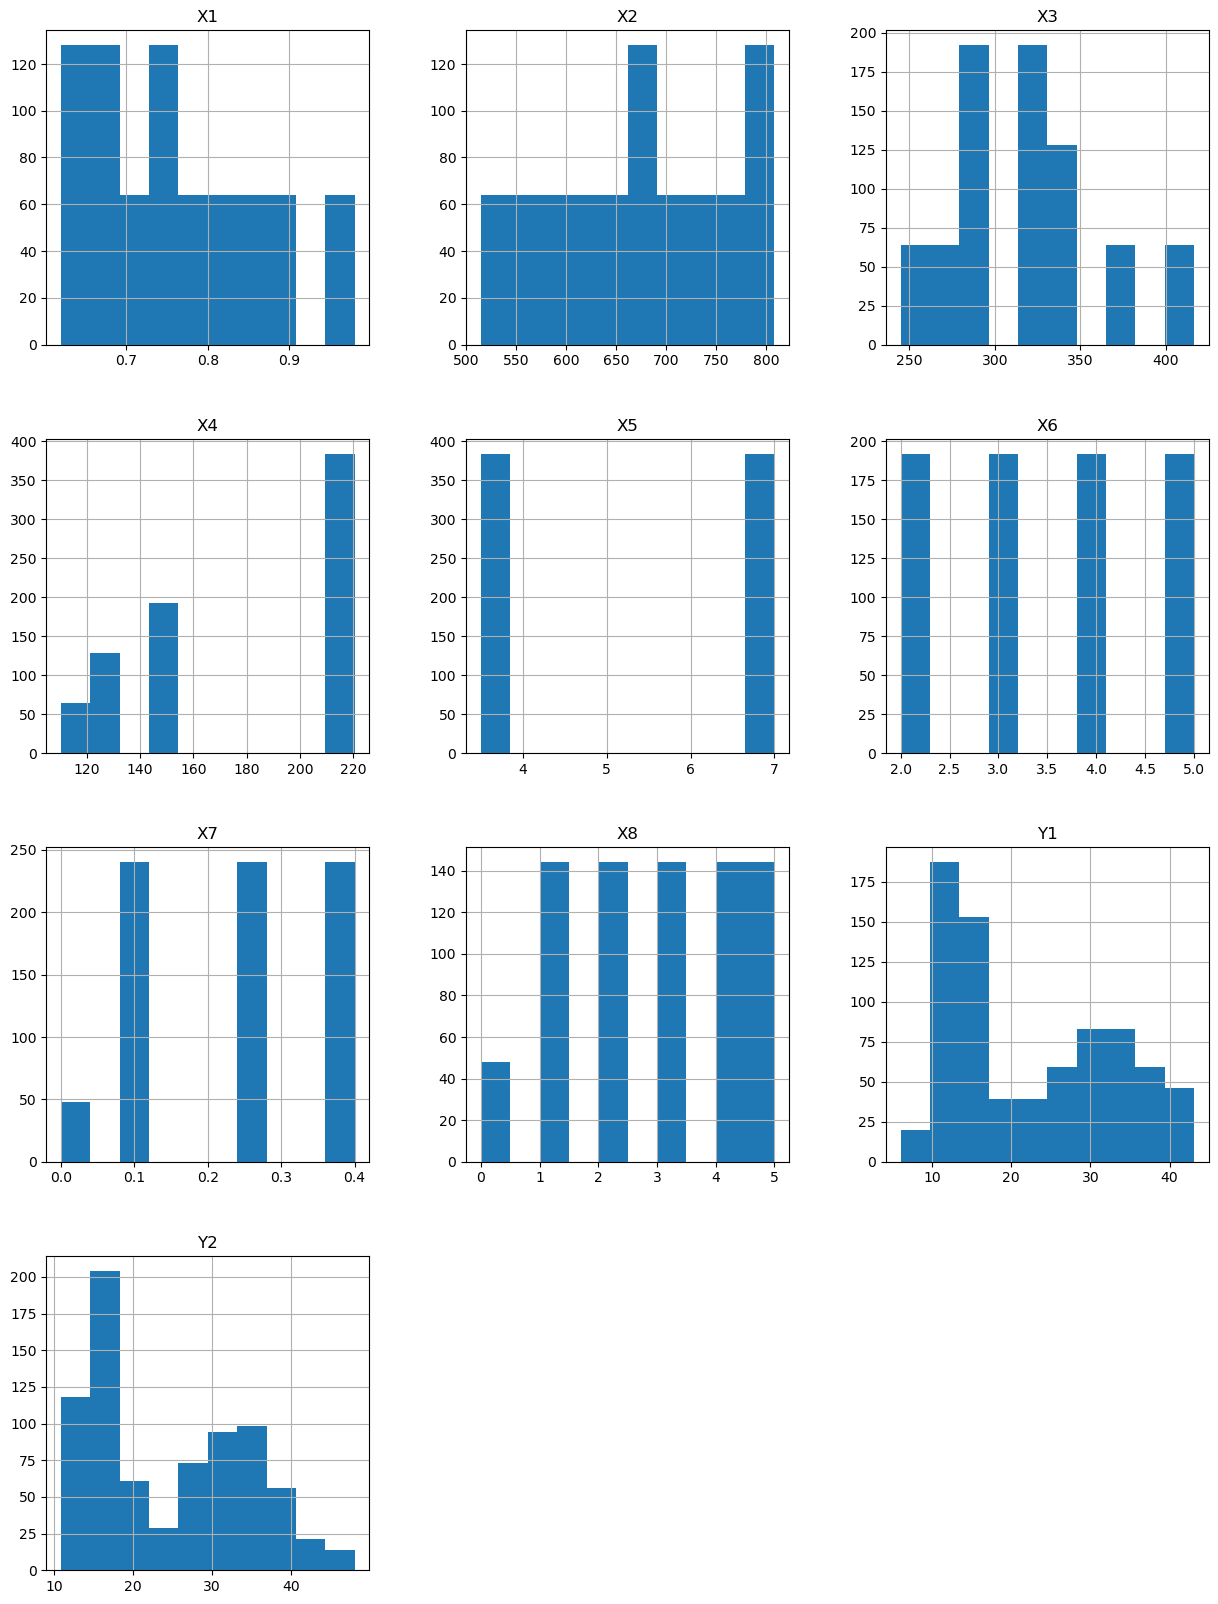

In [13]:
data_init.hist(figsize=(15, 20), xlabelsize=10, ylabelsize=10);

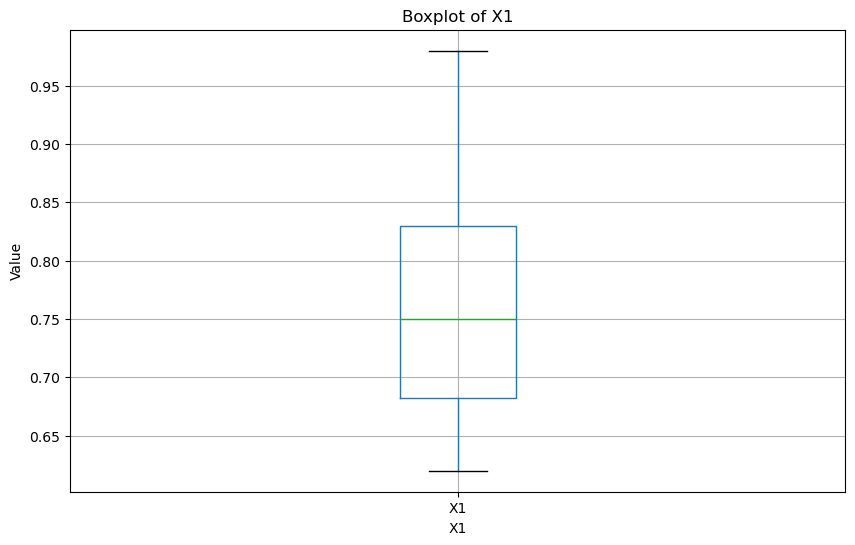

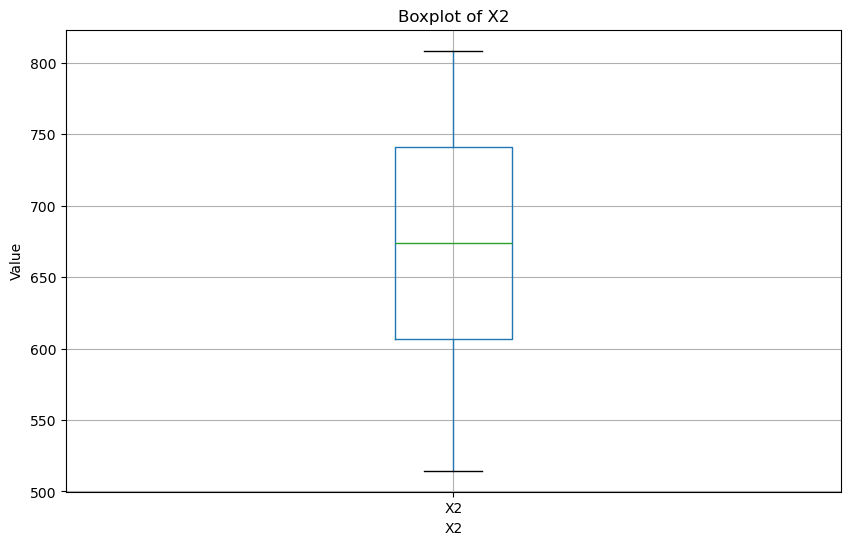

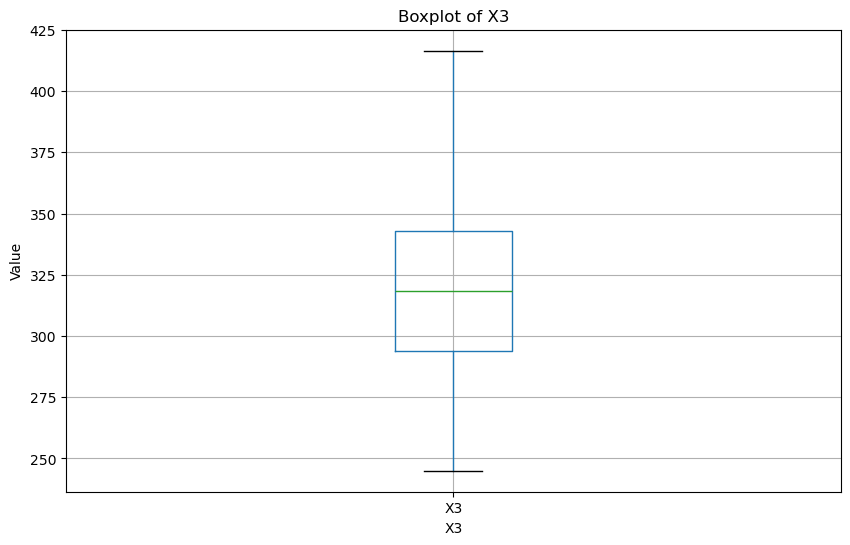

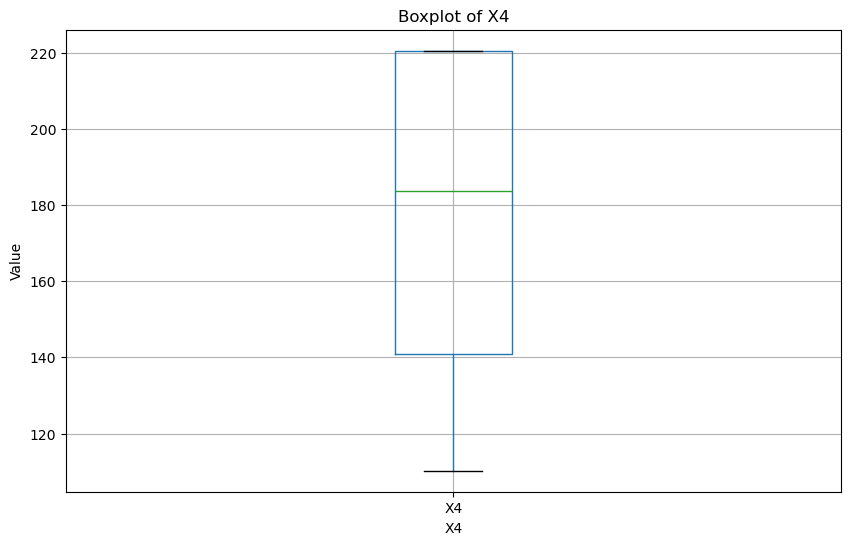

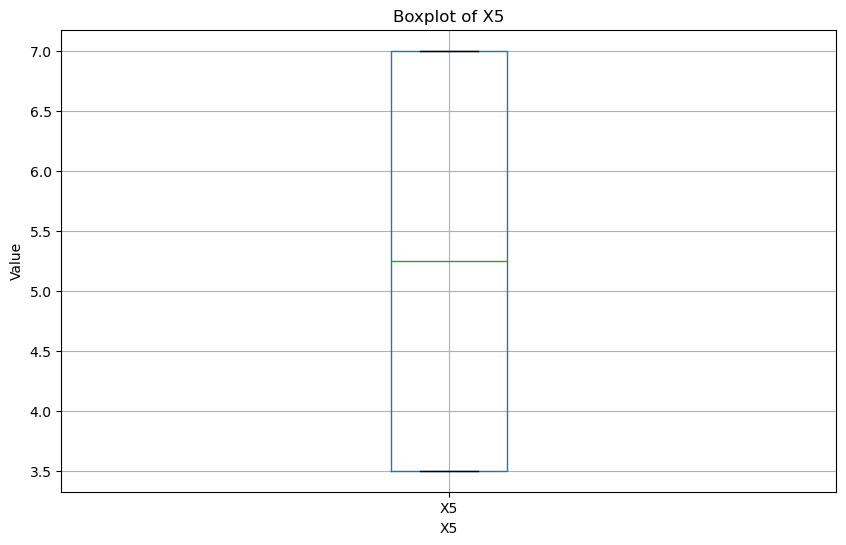

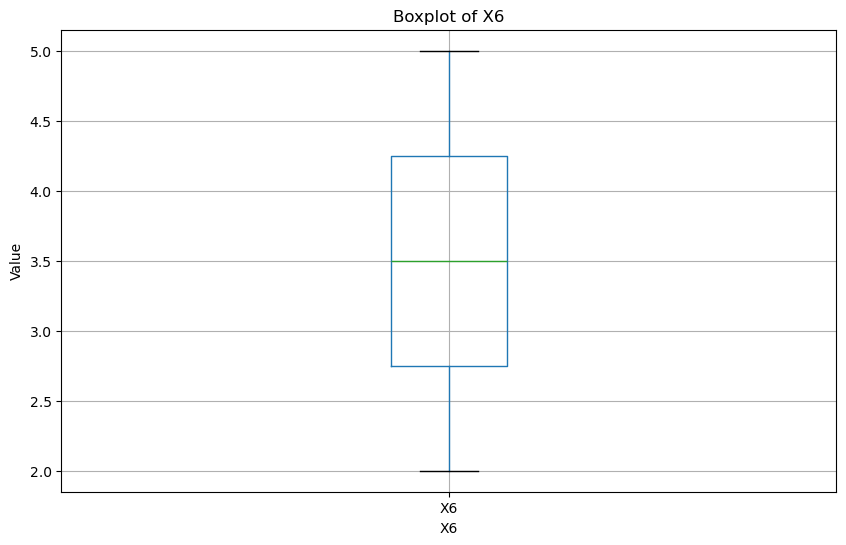

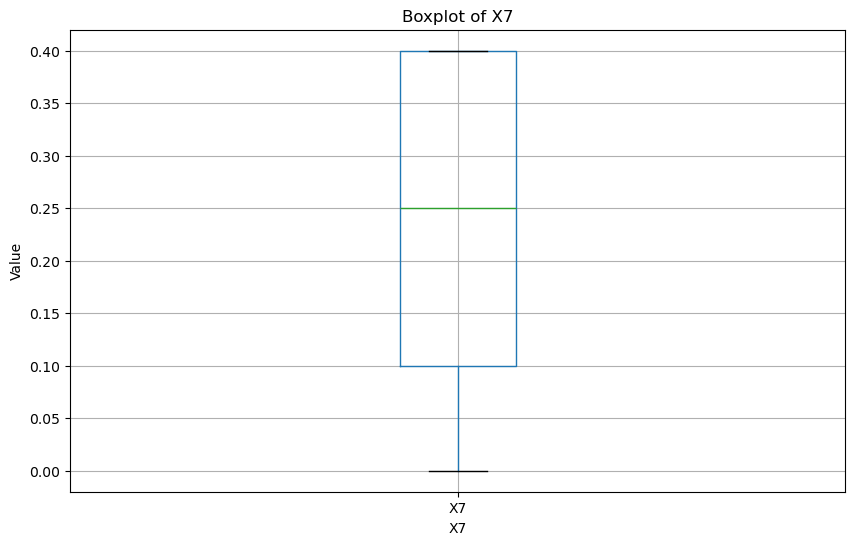

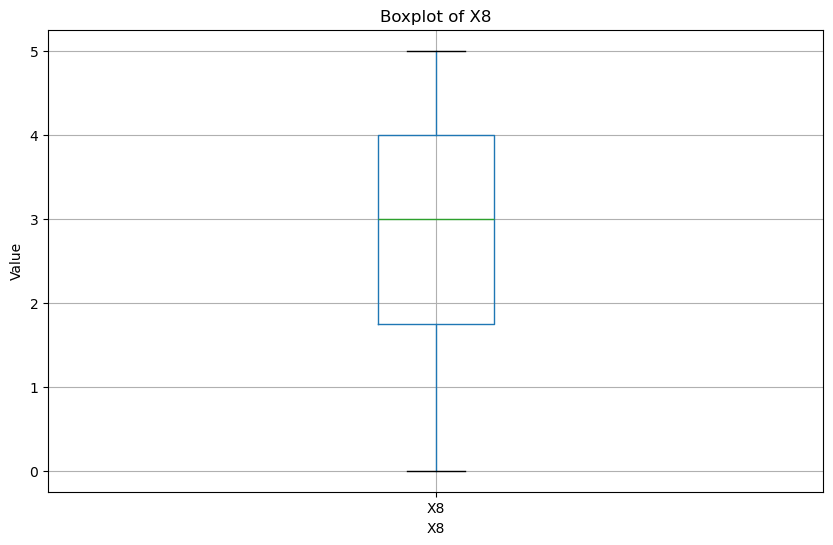

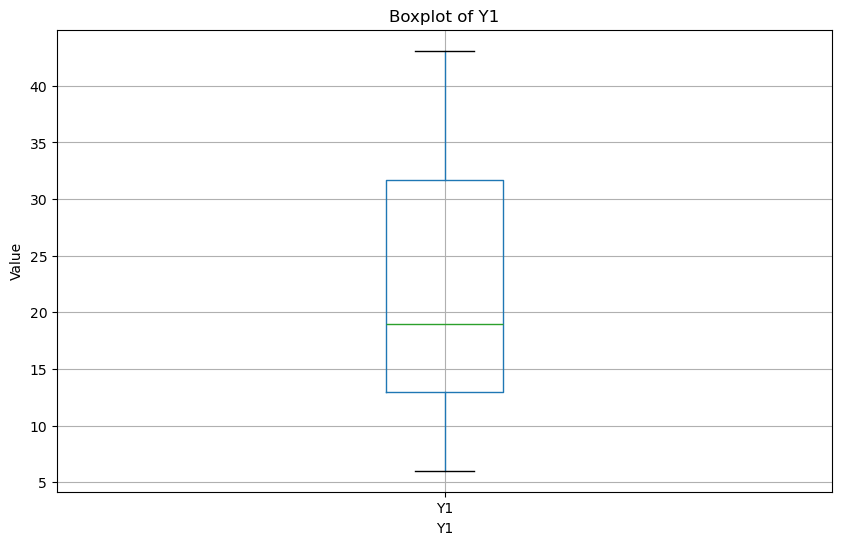

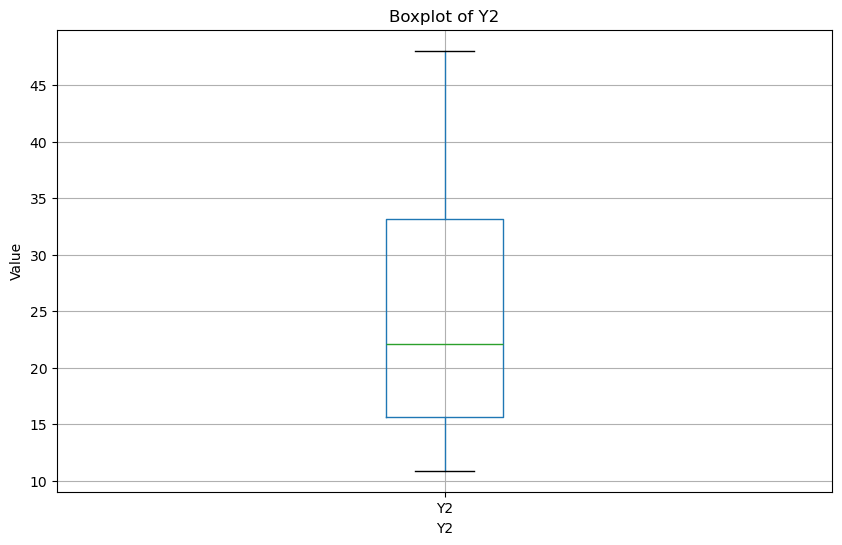

In [14]:
for column in data_init.columns:
    plt.figure(figsize=(10, 6))  # Adjust the size for individual plots
    data_init.boxplot(column=column, fontsize=10)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

          X1        X2        X3        X4        X5        X6        X7  \
X1  1.000000 -1.000000 -0.255805 -0.870886  0.869048  0.000000  0.000000   
X2 -1.000000  1.000000  0.255805  0.870886 -0.869048  0.000000  0.000000   
X3 -0.255805  0.255805  1.000000 -0.193457  0.220763  0.000000  0.000000   
X4 -0.870886  0.870886 -0.193457  1.000000 -0.937043  0.000000  0.000000   
X5  0.869048 -0.869048  0.220763 -0.937043  1.000000  0.000000  0.000000   
X6  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
X7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
X8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.187592   
Y1  0.622135 -0.622135  0.471458 -0.804027  0.861283 -0.004168  0.322860   
Y2  0.651019 -0.651019  0.415991 -0.803175  0.864876  0.017606  0.288904   

          X8        Y1        Y2  
X1  0.000000  0.622135  0.651019  
X2  0.000000 -0.622135 -0.651019  
X3  0.000000  0.471458  0.415991  
X4  0.000000 -0.804027 

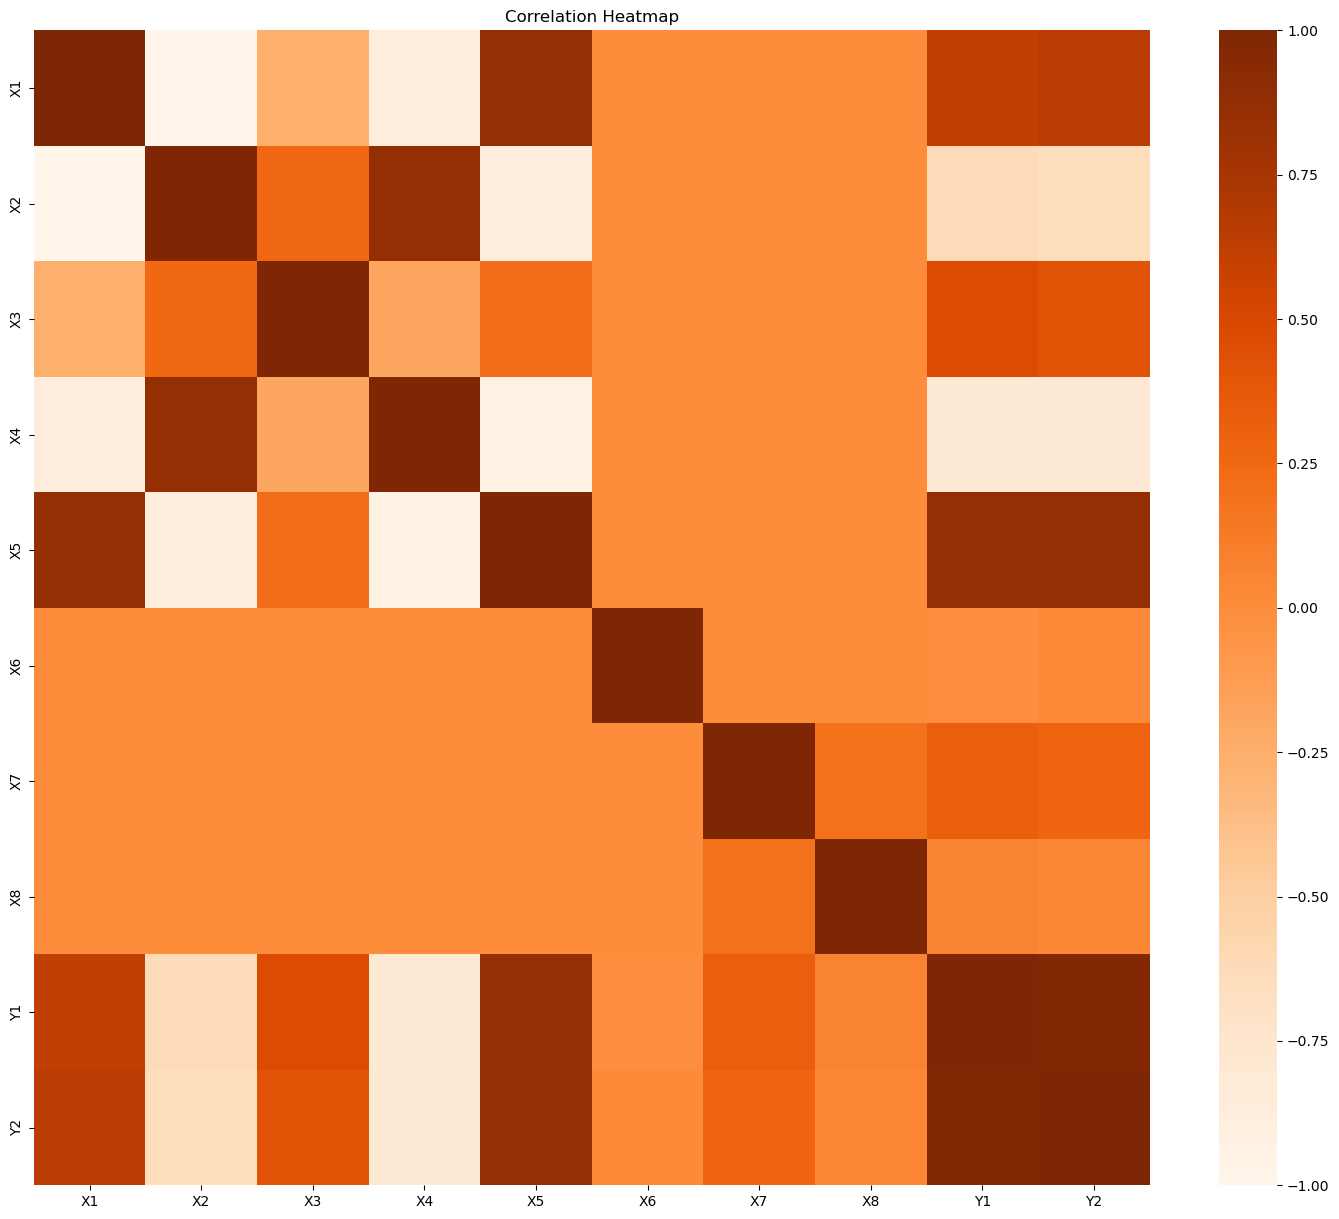

In [15]:
#correlation des features
correlation_matrix = data_init.corr(method='spearman')
print(correlation_matrix)
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=False, cmap="Oranges")

plt.title("Correlation Heatmap")
plt.show()

In [16]:
#Defining targets and features
features= data_init[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
target1=data_init["Y1"]
target2=data_init["Y2"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target1, test_size = 0.20, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target2, test_size = 0.20, random_state=0)

In [17]:
data_init_plot=data_init.copy()
nomcol={"X1":"Relative Compactness",
"X2":"Surface Area",
"X3":"Wall Area",
"X4":"Roof Area",
"X5":"Overall Height",
"X6":"Orientation",
"X7":"Glazing Area",
"X8":"Glazing Area Distribution",
"Y1":"Heating Load",
"Y2":"Cooling Load"}
data_init_plot = data_init_plot.rename(columns=nomcol)
feat=["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height","Orientation","Glazing Area","Glazing Area Distribution","Heating Load","Cooling Load"]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


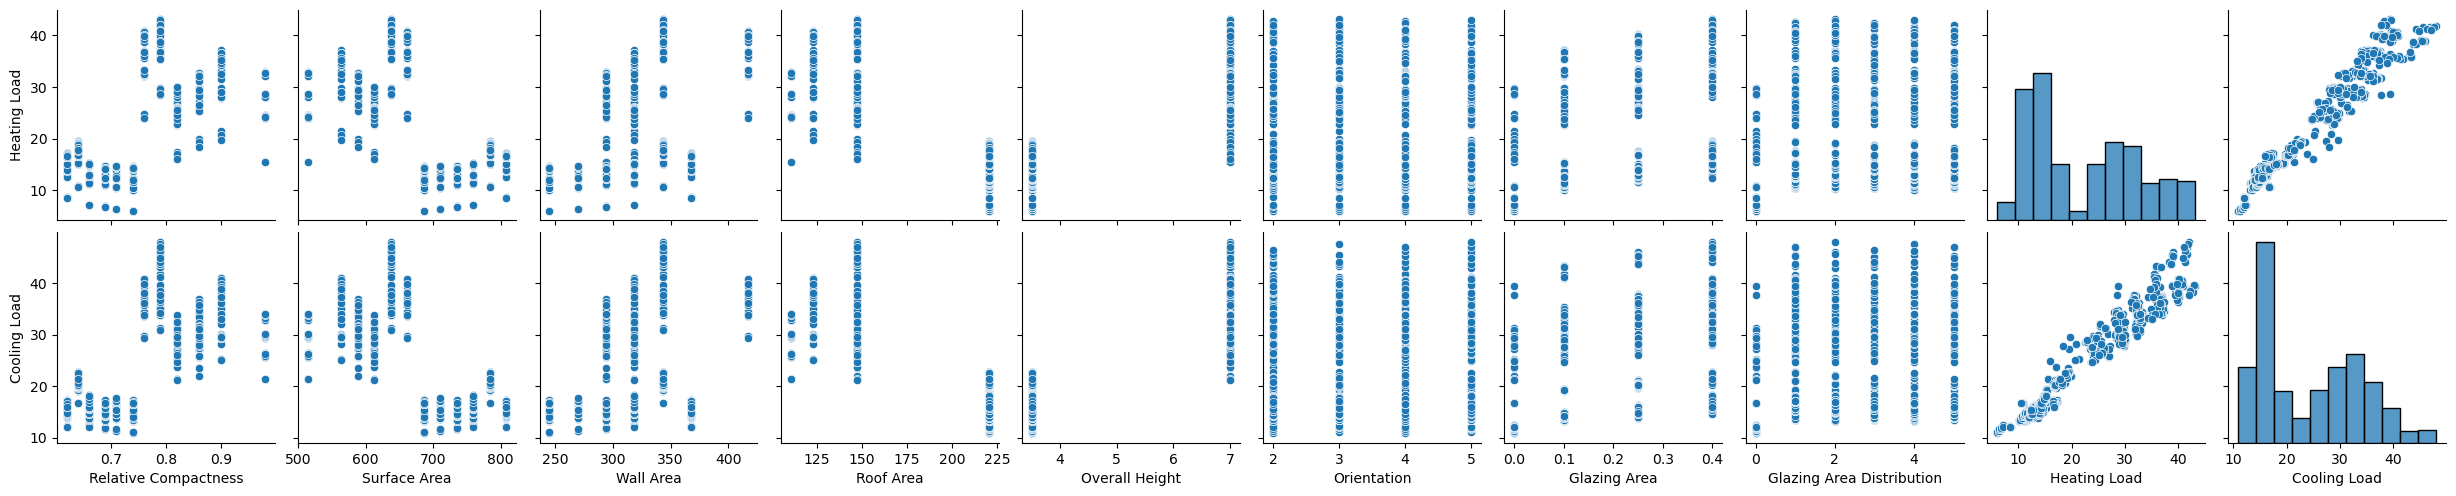

In [18]:
sns.pairplot(data_init_plot, y_vars=["Heating Load","Cooling Load"], x_vars=feat, kind='scatter');

In [19]:
#checking random_state=0
#X_train1.describe(),X_train2.describe()

In [20]:
#Data transformation => features normalization, fitted on X_train1 as random_state=0 from train_test_split
normalizer = MinMaxScaler()
normalizer.fit(X_train1)

X_train_norm1 = normalizer.transform(X_train1)
X_test_norm1 = normalizer.transform(X_test1)
X_train_norm1 = pd.DataFrame(X_train_norm1, columns=X_train1.columns, index=X_train1.index )
X_test_norm1 = pd.DataFrame(X_test_norm1, columns=X_test1.columns, index=X_test1.index)

 
X_train_norm2 = normalizer.transform(X_train2)
X_test_norm2 = normalizer.transform(X_test2)
X_train_norm2 = pd.DataFrame(X_train_norm2, columns=X_train2.columns, index=X_train2.index )
X_test_norm2= pd.DataFrame(X_test_norm2, columns=X_test2.columns, index=X_test2.index)

In [21]:
#KNN regressor model, as it doesn't depend on normality of data distribution as linear model.
#Prediction of Y1: heating load
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train_norm1, y_train1)

KNeighborsRegressor()

In [22]:
#Results KNN heating load
predictionsknn1 = knn1.predict(X_test_norm1)
# Compute the evaluation metrics
mae_knn1 = mean_absolute_error(y_test1, predictionsknn1)
mse_knn1 = mean_squared_error(y_test1, predictionsknn1)
rmse_knn1 = np.sqrt(mse_knn1)
r2_knn1 = r2_score(y_test1, predictionsknn1)

# Save the metrics into a dictionary
metrics_knn1 = {
    "Mean Absolute Error KNN1": [mae_knn1],
    "Mean Squared Error KNN1": [mse_knn1],
    "Root Mean Squared Error KNN1": [rmse_knn1],
    "R-squared KNN1": [r2_knn1]
}

# Convert dictionary to DataFrame
metrics_df_knn1 = pd.DataFrame(metrics_knn1)

# Print the DataFrame
print(metrics_df_knn1)

   Mean Absolute Error KNN1  Mean Squared Error KNN1  \
0                  2.025301                 9.345755   

   Root Mean Squared Error KNN1  R-squared KNN1  
0                      3.057083        0.915367  


In [23]:
#KNN regressor model, as it doesn't depend on normality of data distribution as linear model.
#Prediction of Y2: cooling load
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train_norm2, y_train2)

KNeighborsRegressor()

In [24]:
#Results KNN cooling load
predictionsknn2 = knn2.predict(X_test_norm2)
# Compute the evaluation metrics
mae_knn2 = mean_absolute_error(y_test1, predictionsknn2)
mse_knn2 = mean_squared_error(y_test1, predictionsknn2)
rmse_knn2 = np.sqrt(mse_knn2)
r2_knn2 = r2_score(y_test2, predictionsknn2)

# Save the metrics into a dictionary
metrics_knn2 = {
    "Mean Absolute Error KNN2": [mae_knn2],
    "Mean Squared Error KNN2": [mse_knn2],
    "Root Mean Squared Error KNN2": [rmse_knn2],
    "R-squared KNN2": [r2_knn2]
}

# Convert dictionary to DataFrame
metrics_df_knn2 = pd.DataFrame(metrics_knn2)

# Print the DataFrame
print(metrics_df_knn2)

   Mean Absolute Error KNN2  Mean Squared Error KNN2  \
0                  3.455545                18.506228   

   Root Mean Squared Error KNN2  R-squared KNN2  
0                      4.301887        0.891359  


In [25]:
#Random forest regressor heating load
forest1 = RandomForestRegressor(n_estimators=100, max_depth=12)
forest1.fit(X_train_norm1, y_train1)

RandomForestRegressor(max_depth=12)

In [26]:
#Results RandomForest cooling load
predictionsRF1 = forest1.predict(X_test_norm1)
# Compute the evaluation metrics
mae_RF1 = mean_absolute_error(y_test1, predictionsRF1)
mse_RF1 = mean_squared_error(y_test1, predictionsRF1)
rmse_RF1 = np.sqrt(mse_RF1)
r2_RF1 = r2_score(y_test1, predictionsRF1)

# Save the metrics into a dictionary
metrics_RF1 = {
    "Mean Absolute Error RF1": [mae_RF1],
    "Mean Squared Error RF1": [mse_RF1],
    "Root Mean Squared Error RF1": [rmse_RF1],
    "R-squared RF1": [r2_RF1]
}

# Convert dictionary to DataFrame
metrics_df_RF1 = pd.DataFrame(metrics_RF1)

# Print the DataFrame
print(metrics_df_RF1)

   Mean Absolute Error RF1  Mean Squared Error RF1  \
0                 0.379185                0.333355   

   Root Mean Squared Error RF1  R-squared RF1  
0                     0.577369       0.996981  


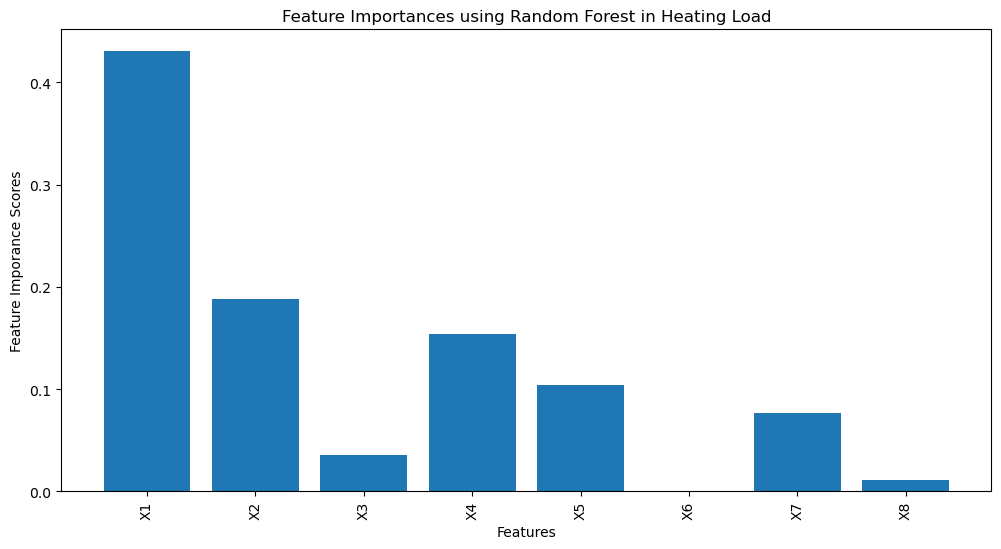

In [27]:
# Get feature importances via visualization
importancesRF1 = forest1.feature_importances_

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(features.shape[1]), importancesRF1)
plt.xticks(range(features.shape[1]), features.columns, rotation=90)
plt.ylabel('Feature Imporance Scores')
plt.xlabel('Features')
plt.title('Feature Importances using Random Forest in Heating Load')
plt.show()

In [28]:
#Defining parameters for grid search ,used for both heating and cooling load
param_grid = {  
   'n_estimators': [50, 100, 200, 300],  
   'max_depth': [6, 8, 10, 12],  
   'min_samples_split': [2, 5, 10],  
   'min_samples_leaf': [1, 2, 4]  
}  

In [29]:
#Search grid on RF heating load
grid_search1 = GridSearchCV(estimator=forest1, param_grid=param_grid, cv=5, n_jobs=-1,verbose = 3)  
grid_search1.fit(X_train_norm1, y_train1) 
# Get the best hyperparameters and the corresponding model  
best_hyperparams1 = grid_search1.best_params_  
best_model1 = grid_search1.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [30]:
#Result search grid on RF for heating load
print("Best Hyperparameters:", best_hyperparams1) 
#Results RandomForest cooling load
predictionsRF1best = best_model1.predict(X_test_norm1)
# Compute the evaluation metrics
mae_RF1best = mean_absolute_error(y_test1, predictionsRF1best)
mse_RF1best = mean_squared_error(y_test1, predictionsRF1best)
rmse_RF1best = np.sqrt(mse_RF1)
r2_RF1best = r2_score(y_test1, predictionsRF1best)

# Save the metrics into a dictionary
metrics_RF1best = {
    "Mean Absolute Error best RF1": [mae_RF1best],
    "Mean Squared Error best RF1": [mse_RF1best],
    "Root Mean Squared best Error RF1": [rmse_RF1best],
    "R-squared best RF1": [r2_RF1best]
}

# Convert dictionary to DataFrame
metrics_df_RF1best = pd.DataFrame(metrics_RF1best)

# Print the DataFrame
print(metrics_df_RF1best)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
   Mean Absolute Error best RF1  Mean Squared Error best RF1  \
0                      0.394937                     0.358593   

   Root Mean Squared best Error RF1  R-squared best RF1  
0                          0.577369            0.996753  


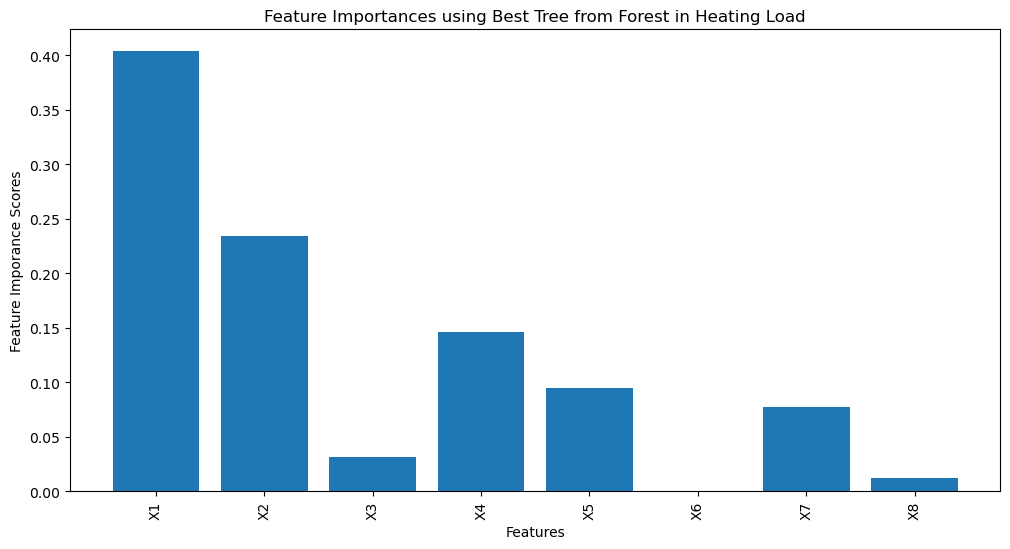

In [31]:
# Get feature importances via visualization
importancesRF1best = best_model1.feature_importances_

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(features.shape[1]), importancesRF1best)
plt.xticks(range(features.shape[1]), features.columns, rotation=90)
plt.ylabel('Feature Imporance Scores')
plt.xlabel('Features')
plt.title('Feature Importances using Best Tree from Forest in Heating Load')
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.796999 to fit



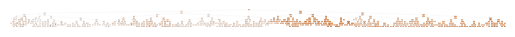

In [40]:
#Best tree for heating Load
# Extract the first tree from the best model
tree_heating = best_model1.estimators_[0]

# Export the tree to a dot file
export_graphviz(
    tree_heating,
    out_file='tree_heating.dot',
    feature_names=X_train_norm1.columns,
    filled=True,
    rounded=True
)

# Convert dot file to a format we can display (e.g., png)
with open("tree_heating.dot") as f:
    dot_graph = f.read()

graph = pydotplus.graph_from_dot_data(dot_graph)
image_path = "tree_heating.png"
graph.write_png(image_path)

# Display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

In [32]:
#Random forest regressor cooling load
forest2 = RandomForestRegressor(n_estimators=100, max_depth=12)
forest2.fit(X_train_norm2, y_train2)

RandomForestRegressor(max_depth=12)

In [33]:
#Results RandomForest cooling load
predictionsRF2 = forest2.predict(X_test_norm2)
# Compute the evaluation metrics
mae_RF2 = mean_absolute_error(y_test2, predictionsRF2)
mse_RF2 = mean_squared_error(y_test2, predictionsRF2)
rmse_RF2 = np.sqrt(mse_RF2)
r2_RF2 = r2_score(y_test2, predictionsRF2)

# Save the metrics into a dictionary
metrics_RF2 = {
    "Mean Absolute Error RF2": [mae_RF2],
    "Mean Squared Error RF2": [mse_RF2],
    "Root Mean Squared Error RF2": [rmse_RF2],
    "R-squared RF2": [r2_RF2]
}

# Convert dictionary to DataFrame
metrics_df_RF2 = pd.DataFrame(metrics_RF2)

# Print the DataFrame
print(metrics_df_RF2)

   Mean Absolute Error RF2  Mean Squared Error RF2  \
0                 1.077418                3.227811   

   Root Mean Squared Error RF2  R-squared RF2  
0                     1.796611       0.965682  


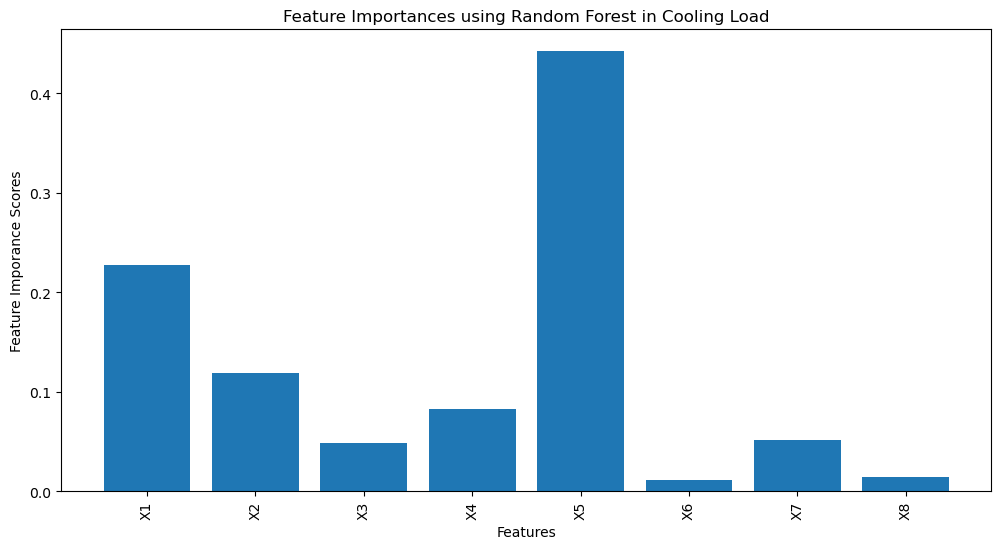

In [34]:
# Get feature importances via visualization
importancesRF2 = forest2.feature_importances_

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(features.shape[1]), importancesRF2)
plt.xticks(range(features.shape[1]), features.columns, rotation=90)
plt.ylabel('Feature Imporance Scores')
plt.xlabel('Features')
plt.title('Feature Importances using Random Forest in Cooling Load')
plt.show()

In [35]:
#Search grid on RF cooling load
grid_search2 = GridSearchCV(estimator=forest2, param_grid=param_grid, cv=5, n_jobs=-1,verbose = 3)  
grid_search2.fit(X_train_norm2, y_train2) 
# Get the best hyperparameters and the corresponding model  
best_hyperparams2 = grid_search2.best_params_  
best_model2 = grid_search2.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [36]:
#Result search grid on RF for cooling load
print("Best Hyperparameters:", best_hyperparams2) 
#Results RandomForest cooling load
predictionsRF2best = best_model2.predict(X_test_norm2)
# Compute the evaluation metrics
mae_RF2best = mean_absolute_error(y_test2, predictionsRF2best)
mse_RF2best = mean_squared_error(y_test2, predictionsRF2best)
rmse_RF2best = np.sqrt(mse_RF2)
r2_RF2best = r2_score(y_test2, predictionsRF2best)

# Save the metrics into a dictionary
metrics_RF2best = {
    "Mean Absolute Error best RF2": [mae_RF2best],
    "Mean Squared Error best RF2": [mse_RF2best],
    "Root Mean Squared best Error RF2": [rmse_RF2best],
    "R-squared best RF2": [r2_RF2best]
}

# Convert dictionary to DataFrame
metrics_df_RF2best = pd.DataFrame(metrics_RF2best)

# Print the DataFrame
print(metrics_df_RF2best)

Best Hyperparameters: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
   Mean Absolute Error best RF2  Mean Squared Error best RF2  \
0                        1.2759                       3.9274   

   Root Mean Squared best Error RF2  R-squared best RF2  
0                          1.796611            0.958244  


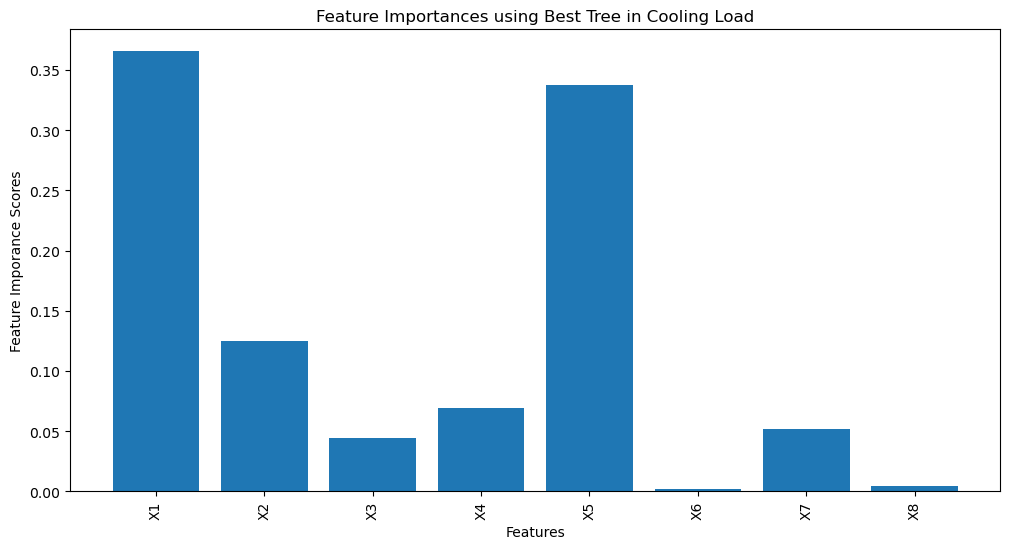

In [37]:
# Get feature importances via visualization
importancesRF2best = best_model2.feature_importances_

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(features.shape[1]), importancesRF2best)
plt.xticks(range(features.shape[1]), features.columns, rotation=90)
plt.ylabel('Feature Imporance Scores')
plt.xlabel('Features')
plt.title('Feature Importances using Best Tree in Cooling Load')
plt.show()

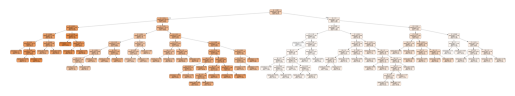

In [41]:
#Best tree for Cooling Load
# Extract the first tree from the best model
tree_cooling = best_model2.estimators_[0]

# Export the tree to a dot file
export_graphviz(
    tree_cooling,
    out_file='tree_cooling.dot',
    feature_names=X_train_norm1.columns,
    filled=True,
    rounded=True
)

# Convert dot file to a format we can display (e.g., png)
with open("tree_cooling.dot") as f:
    dot_graph = f.read()

graph = pydotplus.graph_from_dot_data(dot_graph)
image_path = "tree_cooling.png"
graph.write_png(image_path)

# Display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

In [44]:
#  Collect metrics for easy read 
metrics_df_names = [var_name for var_name in globals() if var_name.startswith("metrics_df_") and isinstance(globals()[var_name], pd.DataFrame)]

for var_name in metrics_df_names:
    df = globals()[var_name]
    print(f"{var_name}:\n{df}\n")

metrics_df_knn1:
   Mean Absolute Error KNN1  Mean Squared Error KNN1  \
0                  2.025301                 9.345755   

   Root Mean Squared Error KNN1  R-squared KNN1  
0                      3.057083        0.915367  

metrics_df_knn2:
   Mean Absolute Error KNN2  Mean Squared Error KNN2  \
0                  3.455545                18.506228   

   Root Mean Squared Error KNN2  R-squared KNN2  
0                      4.301887        0.891359  

metrics_df_RF1:
   Mean Absolute Error RF1  Mean Squared Error RF1  \
0                 0.379185                0.333355   

   Root Mean Squared Error RF1  R-squared RF1  
0                     0.577369       0.996981  

metrics_df_RF1best:
   Mean Absolute Error best RF1  Mean Squared Error best RF1  \
0                      0.394937                     0.358593   

   Root Mean Squared best Error RF1  R-squared best RF1  
0                          0.577369            0.996753  

metrics_df_RF2:
   Mean Absolute Error RF2  Mean S